# Personality Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#Importing the data
data_personality = pd.read_csv('personality_dataset.csv')
data_personality.head(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert


In [3]:
extrovert_people = data_personality[data_personality['Personality'] == 'Extrovert']
introvert_people = data_personality[data_personality['Personality'] == 'Introvert']

print("Comparisons:")
print("Extroverts: friends circle size -> ", extrovert_people['Friends_circle_size'].mean())
print("Introverts: friends circle size -> ", introvert_people['Friends_circle_size'].mean())
print("Comparisons:")
print("Extroverts: how much do they go outside -> ", extrovert_people['Going_outside'].mean())
print("Introverts: how much do they go outside -> ", introvert_people['Going_outside'].mean())

Comparisons:
Extroverts: friends circle size ->  9.1736733287388
Introverts: friends circle size ->  3.196793002915452
Comparisons:
Extroverts: how much do they go outside ->  4.634615384615385
Introverts: how much do they go outside ->  1.2728592162554426


In [4]:
data_personality.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
data_personality.dropna(inplace=True)

In [6]:
data_personality.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
data_personality.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,3.939039,3.013726,6.239806,3.559548
std,3.491162,2.900044,2.257239,4.311365,2.927397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
data_personality['Personality'].value_counts()

Personality
Extrovert    1274
Introvert    1203
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_personality.Personality = labelencoder.fit_transform(data_personality.Personality.values)
data_personality.Drained_after_socializing = labelencoder.fit_transform(data_personality.Drained_after_socializing.values)
data_personality.Stage_fear = labelencoder.fit_transform(data_personality.Stage_fear.values)

Text(0.5, 1.0, 'Personality and Stage fear')

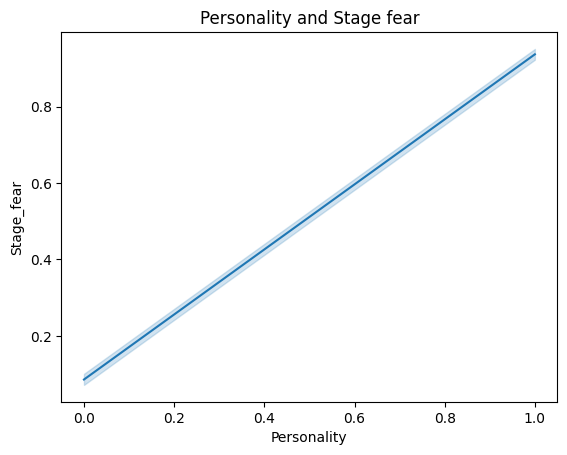

In [10]:
sns.lineplot(data=data_personality, x='Personality', y='Stage_fear')
plt.title("Personality and Stage fear")

Text(0.5, 1.0, 'Correlation among columns/variables')

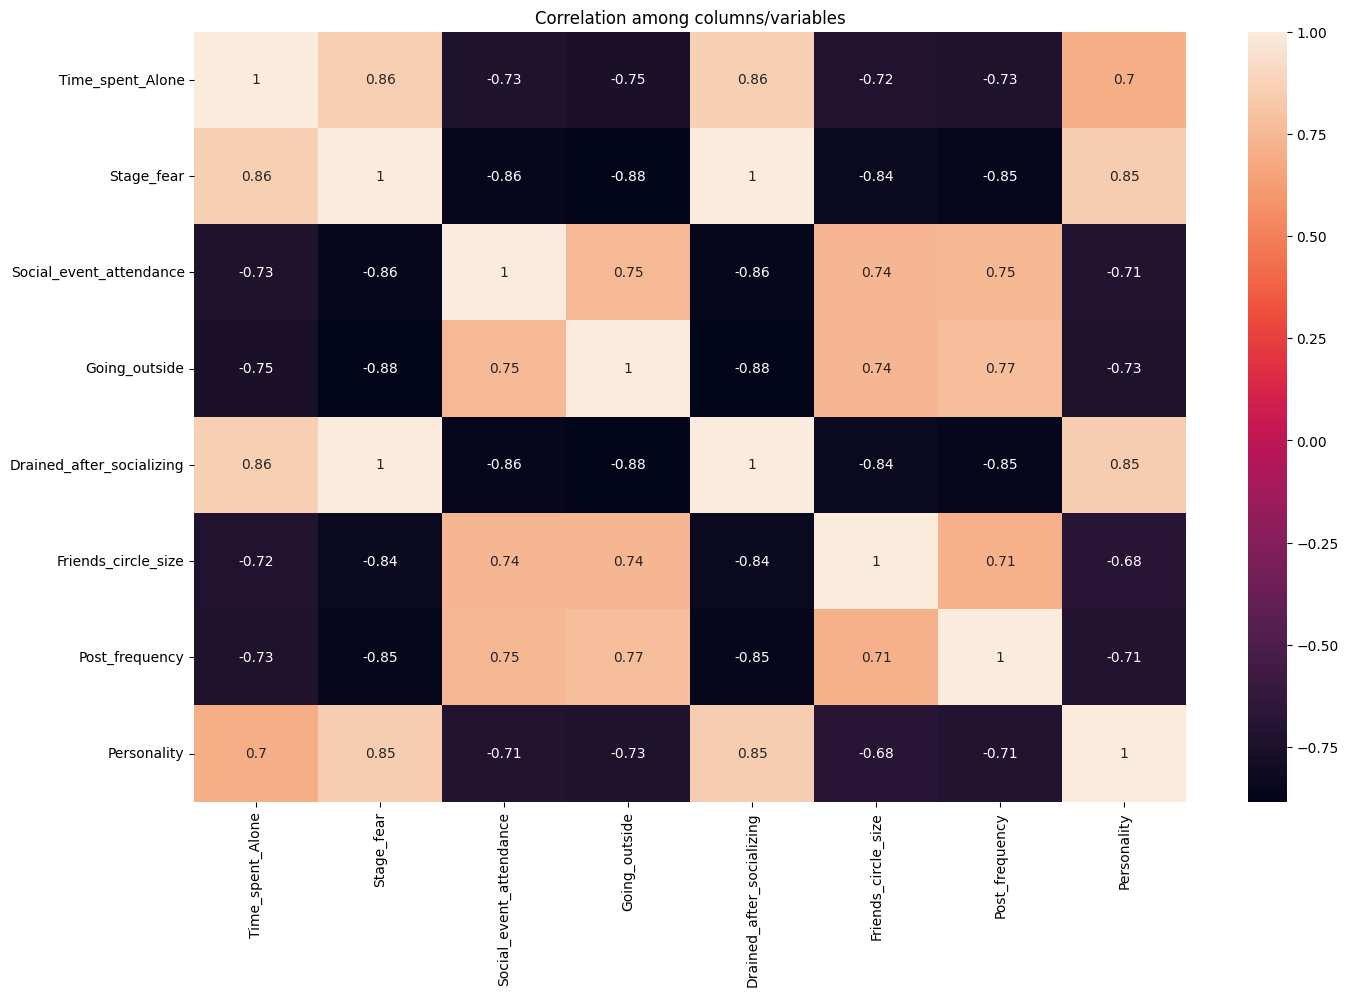

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_personality.corr(), annot=True)
plt.title('Correlation among columns/variables')

#### Preparing data for Logistic Regression
Used for predicting the personality

In [37]:
X = data_personality.drop('Personality', axis=1)
Y = data_personality['Personality']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [40]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

LogisticRegression()

In [41]:
predictions = classifier.predict(x_test)

<Axes: >

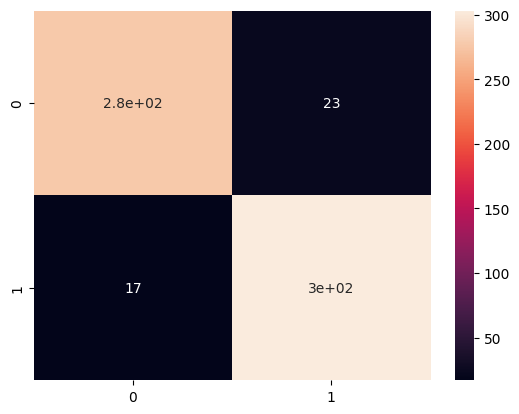

In [42]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [43]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.9354838709677419

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       300
           1       0.93      0.95      0.94       320

    accuracy                           0.94       620
   macro avg       0.94      0.94      0.94       620
weighted avg       0.94      0.94      0.94       620



In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error_ = mean_squared_error(y_test, predictions)
r2_score_ = r2_score(y_test, predictions)
mean_absolute_error_ = mean_absolute_error(y_test, predictions)

print("Mean Squared Error: {}".format(mean_squared_error_))
print("R2 score: {}".format(r2_score_))
print("Mean Absolute Error: {}".format(mean_absolute_error_))

Mean Squared Error: 0.06451612903225806
R2 score: 0.7416666666666667
Mean Absolute Error: 0.06451612903225806


# Analysis of only friends circle size

In [30]:
X = data_personality['Friends_circle_size']
Y = data_personality['Personality']
X = np.array(X)
Y = np.array(Y)
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)

# reshaping the array from (500,) to (500, 1)
Y = Y.reshape(-1,1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [32]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

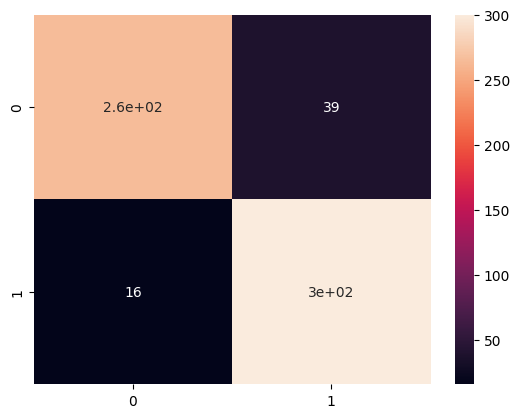

In [33]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error_ = mean_squared_error(y_test, predictions)
r2_score_ = r2_score(y_test, predictions)
mean_absolute_error_ = mean_absolute_error(y_test, predictions)

print("Mean Squared Error: {}".format(mean_squared_error_))
print("R2 score: {}".format(r2_score_))
print("Mean Absolute Error: {}".format(mean_absolute_error_))

Mean Squared Error: 0.08870967741935484
R2 score: 0.6450283144570286
Mean Absolute Error: 0.08870967741935484


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       304
           1       0.88      0.95      0.92       316

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620



In [36]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.9112903225806451

## There is less accuracy when the analysis takes only the 'friends circle size' as a variables